# Sympy 的使用

## 1.Introduction

### 1.1 Symbols

In [1]:
from matplotlib import rc

rc('text', usetex=True)
from sympy import *
# ways to define a symbol
# 1.
from sympy.abc import x

# 2.
y = symbols('y')
a, b = symbols('a b')

In [2]:
# understand the difference between variables and symbols
expr = x + 1
x = 2
expr

x + 1

In [3]:
# why we need define x as a symbol again?
x = symbols('x')
x + 2 * y

x + 2*y

### 1.2 Functions

In [4]:
f = 1 / (((x + 1) ** 2 * (x - 1) ** 4) ** Rational(1, 3))
f

((x - 1)**4*(x + 1)**2)**(-1/3)

In [5]:
Integral(1 / (((x + 1) ** 2 * (x - 1) ** 4) ** Rational(1, 3)), x).doit()

Integral(((x - 1)**4*(x + 1)**2)**(-1/3), x)

In [6]:
f = tanh(a * x)
f

tanh(a*x)

In [7]:
# integrate(x): 对 x 求不定积分
f.integrate(x)

Piecewise((x - log(tanh(a*x) + 1)/a, Ne(a, 0)), (0, True))

In [8]:
# diff(x): 对 x 求导
f.diff(x)

a*(1 - tanh(a*x)**2)

In [9]:
# subs(x, c):将变量 x 代换为常数 c
# Rational(a, b):返回实数(a / b)
# simplify():化简
f.diff(a).subs(x, Rational(1, 2))

1/2 - tanh(a/2)**2/2

In [10]:
f.diff(a).subs(x, Rational(1, 2)).simplify()

1/(2*cosh(a/2)**2)

### 1.3 Equation

In [11]:
# the wrong way to use equation in sympy
(x + 1) ** 2 == x ** 2 + 2 * x + 1

False

In [12]:
# the right ways to use equation in sympy
# 1.
p = (x + 1) ** 2
q = x ** 2 + 2 * x + 1
simplify(p - q)

0

In [13]:
# 2.
p.equals(q)

True

### 1.4 ^ and /

In [14]:
# ^: 异或
Xor(x, y)

x ^ y

In [15]:
# /: 除号
x + 1 / 2

x + 0.5

In [16]:
x + Rational(1, 2)

x + 1/2

## 2.Copilot(微积分)

In [17]:
atan(x).integrate()

x*atan(x) - log(x**2 + 1)/2

In [18]:
# 分部积分
u = atan(x)
v = x
leftHandSide = Integral(u * v.diff())
rightHandSide = u * v - Integral(u.diff() * v)

In [19]:
leftHandSide

Integral(atan(x), x)

In [20]:
rightHandSide

x*atan(x) - Integral(x/(x**2 + 1), x)

In [21]:
(leftHandSide - rightHandSide).simplify()

0

In [22]:
Integral(1 / (x ** 2 + a * x + b), x).doit()

sqrt(1/(a**2 - 4*b))*log(-a**2*sqrt(1/(a**2 - 4*b))/2 + a/2 + 2*b*sqrt(1/(a**2 - 4*b)) + x) - sqrt(1/(a**2 - 4*b))*log(a**2*sqrt(1/(a**2 - 4*b))/2 + a/2 - 2*b*sqrt(1/(a**2 - 4*b)) + x)

In [23]:
(E ** (I * x)).series(n=12)

1 + I*x - x**2/2 - I*x**3/6 + x**4/24 + I*x**5/120 - x**6/720 - I*x**7/5040 + x**8/40320 + I*x**9/362880 - x**10/3628800 - I*x**11/39916800 + O(x**12)

In [24]:
(E ** (I * x)).series(n=12).collect(I)  # 以 I 进行整理

1 + I*(x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + O(x**12)) - x**2/2 + x**4/24 - x**6/720 + x**8/40320 - x**10/3628800 + O(x**12)

In [25]:
sin(x).series(n=12)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + O(x**12)

In [26]:
cos(x).series(n=12)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 - x**10/3628800 + O(x**12)

## 3.线性代数

In [27]:
H2 = Matrix([[1, 1], [1, -1]]) * a
H2

Matrix([
[a,  a],
[a, -a]])

In [28]:
H4 = kronecker_product(H2, H2)
H4

Matrix([
[a**2,  a**2,  a**2,  a**2],
[a**2, -a**2,  a**2, -a**2],
[a**2,  a**2, -a**2, -a**2],
[a**2, -a**2, -a**2,  a**2]])

In [29]:
U, S = H4.diagonalize()  # 矩阵对角化

In [30]:
U

Matrix([
[ 0, -1, 2, 1],
[-1,  2, 1, 0],
[ 1,  0, 1, 0],
[ 0,  1, 0, 1]])

In [31]:
S

Matrix([
[-2*a**2,       0,      0,      0],
[      0, -2*a**2,      0,      0],
[      0,       0, 2*a**2,      0],
[      0,       0,      0, 2*a**2]])

## 4.量子计算

In [32]:
H4 = H4.subs(a, 1 / sqrt(2))
s0 = Matrix([0, 0, 0, 1])
s1 = Matrix([0, 0, 1, 1])
s2 = Matrix([0, 1, 0, 1])
s3 = Matrix([1, 0, 0, 1])
H4

Matrix([
[1/2,  1/2,  1/2,  1/2],
[1/2, -1/2,  1/2, -1/2],
[1/2,  1/2, -1/2, -1/2],
[1/2, -1/2, -1/2,  1/2]])

In [33]:
H4 * s0

Matrix([
[ 1/2],
[-1/2],
[-1/2],
[ 1/2]])

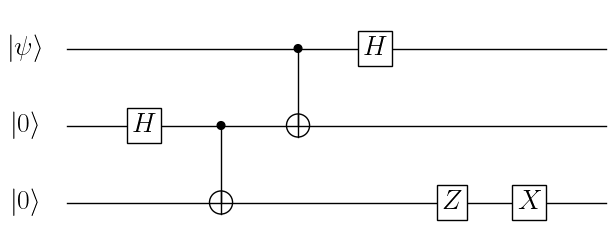

In [35]:
from sympy.physics.quantum import circuitplot
from sympy.physics.quantum.gate import *

circuit = X(0) * Z(0) * H(2) * CNOT(2, 1) * CNOT(1, 0) * H(1)
circuitplot.CircuitPlot(circuit, 3, labels=[0, 0, '\psi'])

# 约束求解

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import z3

x, y, z, a, b, c = z3.Ints('x y z a b c')

AttributeError: module 'z3' has no attribute 'Ints'

In [34]:
x + y

x + y

## 1.枚举求解一切

In [35]:
solve(x ** 2 + y ** 2 == z ** 2, x > 0, y > 0, z >= 1000)

[x = 936, z = 1000, y = 352]


## 2.列方程求解

In [36]:
# 得到皇后问题的一个解
n = 16
Q = [Int(f'Q_{i}') for i in range(n)]
C1 = [And(Q[i] != Q[j], Abs(Q[i] - Q[j]) != Abs(i - j)) for i in range(n) for j in range(n) if i != j]
C2 = [And(0 <= Q[i], Q[i] < n) for i in range(n)]
solve(*C1, *C2)

[Q_3 = 6,
 Q_9 = 8,
 Q_10 = 3,
 Q_8 = 4,
 Q_14 = 5,
 Q_5 = 11,
 Q_0 = 0,
 Q_2 = 13,
 Q_13 = 15,
 Q_15 = 7,
 Q_12 = 9,
 Q_1 = 10,
 Q_7 = 1,
 Q_4 = 2,
 Q_11 = 12,
 Q_6 = 14]


<Figure size 640x480 with 0 Axes>

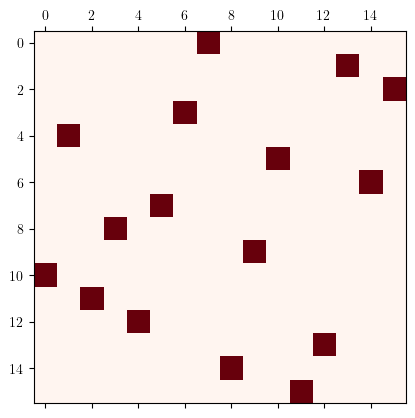

In [37]:
# 可视化
s = Solver()
s.add(*C1, *C2)
s.check()

board = np.zeros((n, n))
for i in range(n):
    board[i][s.model().evaluate(Q[i]).as_long()] = 1

plt.figure()
plt.matshow(board, cmap='Reds')
plt.show()